In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [31]:
def plot2d(x,y,u,figtitle):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x,y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
    ax.set_xlabel('$x$')
    ax.set_xlabel('$y$')
    ax.set_title(figtitle)

In [21]:
def FVM(h,N,mu,dPdz,MAX,TOL):
    dx = h/N
    dy = h/N
    L2norm = np.ones(1)
    
    # Define initial conditions
    w = np.zeros((N,N))
    wp1 = w.copy()
    aE = mu*dy/dx
    aW = mu*dy/dx
    aN = mu*dx/dy
    aS = mu*dx/dy
    Su = dPdz*dy*dx

    l = 0
    while (L2norm[l] > TOL):
        if (l > MAX):
            raise Exception('System not converged after MAX iteration')
        # North Face    
        aB = 2*mu*dx/dy
        aP = aE + aW + aN + aB
        wp1[0,1:-1] = (aE*w[0,2:] + aW*w[0,:-2] + aN*w[1,1:-1] - Su) / aP
        # South Face
        aP = aE + aW + aS + aB
        wp1[-1,1:-1] = (aE*w[-1,2:] + aW*w[-1,:-2] + aS*w[-1,1:-1] - Su) / aP
        # West Face
        aB = 2*mu*dy/dx
        aP = aE + aN + aS + aB
        wp1[1:-1,0] = (aE*w[1:-1,1] + aN*w[2:,0] + aS*w[:-2,0] - Su) / aP
        # East Face
        aP = aW + aN + aS + aB
        wp1[1:-1,-1] = (aW*w[1:-1,-1] + aN*w[2:,-1] + aS*w[:-2,-1] - Su) / aP
        
        # Internal Cells
        aP = aE + aW + aN + aS
        wp1[1:-1,1:-1] = (aW*w[1:-1,:-2] + aE*w[1:-1,2:] + aN*w[2:,1:-1] + aS*w[:-2,1:-1] - Su) / aP
        
        # Fill in corner cells as the mean of adjacent cells
        wp1[0,0] = 0.5*(wp1[1,0] + wp1[0,1])
        wp1[-1,0] = 0.5*(wp1[-2,0] + wp1[-1,1])
        wp1[0,-1] = 0.5*(wp1[0,-2] + wp1[1,-1])
        wp1[-1,-1] = 0.5*(wp1[-1,-2] + wp1[-2,-1])
        
        # Compute Residual L2 norm
        L2norm = np.append(L2norm, (np.sum((w-wp1)**2))**0.5)
        
        w = wp1.copy()
        l+=1
    return w, L2norm

In [22]:
# Domain Length
h = 0.1
mu = 1e-3
dPdz = -3.2
MAX = 50000
TOL = 1e-3
N = np.linspace(10,80,10)
N = N.astype(int)
wmax = np.zeros(10)

for l in range(0,10):
    w,L2norm = FVM(h, N[l], mu, dPdz, MAX, TOL)
    wmax[l] = w[int(N[l]/2)-1,int(N[l]/2)-1]
    print("N = ", N[l] , "wmax = ", wmax[l])

N =  10 wmax =  2.1978609254569146
N =  17 wmax =  2.209734518759434
N =  25 wmax =  2.2523405973803885
N =  33 wmax =  2.2724799618591436
N =  41 wmax =  2.2833706143584718
N =  48 wmax =  2.292508129903092
N =  56 wmax =  2.2953831171534036
N =  64 wmax =  2.296830009016923
N =  72 wmax =  2.2972843971097343
N =  80 wmax =  2.2970318787094475


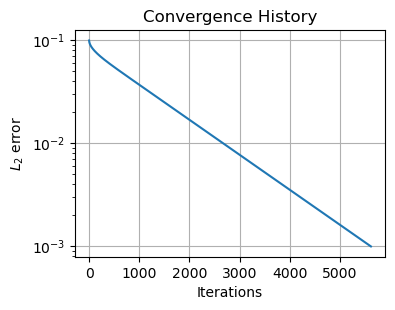

In [24]:
fig = plt.figure(figsize=(4,3), dpi=100)
plt.semilogy(L2norm[1:])
plt.ylabel('$L_2$ error')
plt.xlabel('Iterations')
plt.title('Convergence History')
plt.grid('both')

Text(0.5, 0, 'Number of cells, $N$')

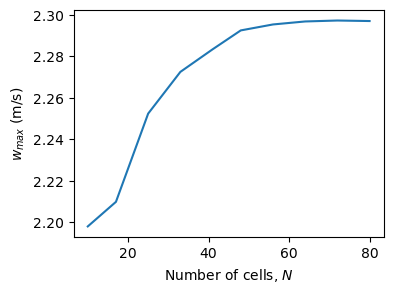

In [25]:
fig = plt.figure(figsize=(4,3), dpi=100)
plt.plot(N,wmax)
plt.ylabel('$w_{max}$ (m/s)')
plt.xlabel('Number of cells, $N$')

In [81]:
cp = plt.contourf(w,x,y)
plt.colorbar(cp)

NameError: name 'x' is not defined

C:\Users\myste\AppData\Local\Temp/ipykernel_20624/2390855301.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


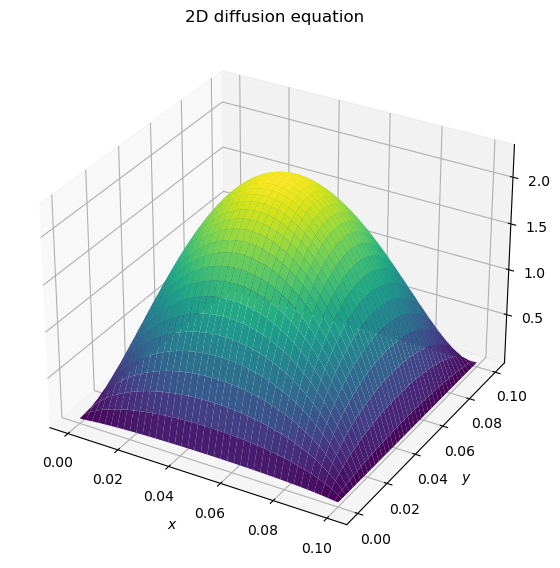

In [73]:
plot2d(np.linspace(0,h,N[-1]),np.linspace(0,h,N[-1]),w,'2D diffusion equation')

#### Analytical Results for Comparsion

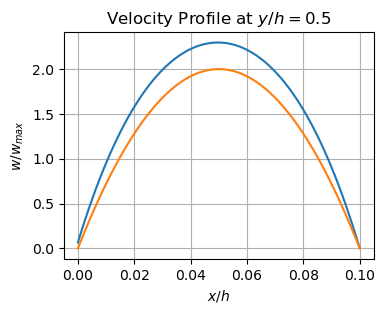

In [33]:
y = np.linspace(0,h,N[-1])
w_analytical = 1/(4*mu)*dPdz*(y**2 - y*h)

fig = plt.figure(figsize=(4,3), dpi=100)
plt.plot(y,w[int(N[-1]/2),:])
plt.plot(y,w_analytical)
plt.xlabel('$x/h$')
plt.ylabel('$w/w_{max}$')
plt.title('Velocity Profile at $y/h = 0.5$')
plt.grid(which='both')